## Coding Exercise #0312

### 1. Compare the Tree-like algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_digits
from scipy.ndimage import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data and explore:

In [2]:
data = load_digits()

In [3]:
# Display the description on the data.
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# The explanatory variables.
X = data['data']
X.shape

(1797, 64)

In [5]:
# The response variable.
Y = data['target']
Y.shape

(1797,)

In [6]:
# Define a visualization function.
def show_data(X, Y, n, angle=0):
    print(Y[n])
    image_matrix = X[n,:].reshape((8,8))                                        # Reshape from 1D to 2D matrix.
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)        # Rotate if wanted.       
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    plt.show()


5


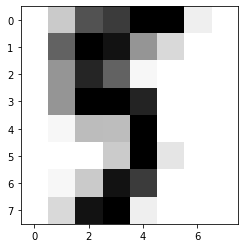

9


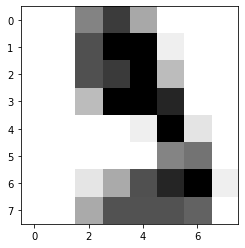

1


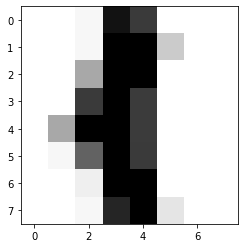

In [7]:
for i in [15,29,99]:
    show_data(X,Y,i)

#### 1.2. Data pre-processing:

In [8]:
# Min-Max scaling to the whole dataset.
X_min = X.min()
X_max = X.max()
X_range = X_max - X_min
X = (X - X_min)/X_range

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.3. Classification with Tree (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [10]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(2,31,2)
max_leaf_nodes_grid = np.arange(2,51,2)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [11]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [12]:
print("Tree best max_depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best max_depth : 15
Tree best min_samples_leaf : 4
Tree best max_leaf_nodes : 48


In [13]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, Y_train)
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.848


#### 1.4. Classification with Random Forest (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [14]:
n_estimators_grid = np.arange(20, 50,2)
depth_grid = np.arange(1, 10)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [15]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 38
Random Forest best max_depth : 8
Random Forest best min_samples_leaf : 10


In [16]:
RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
RF_best.fit(X_train, Y_train)
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.935


#### 1.5. Classification with AdaBoost (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [17]:
my_max_depth = 9                                               # Fixed.
my_learn_rate = 0.01                                           # Fixed.
n_estimators_grid = np.arange(50, 81, 2)
parameters = {'n_estimators': n_estimators_grid}
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth), learning_rate=my_learn_rate)      # Instantiate an estimator.
gridCV = GridSearchCV(AB, param_grid=parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']

In [18]:
print("AdaBoost best n estimator : " + str(best_n_estim))

AdaBoost best n estimator : 60


In [19]:
AB_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth),n_estimators=best_n_estim,learning_rate=my_learn_rate,random_state=123)
AB_best.fit(X_train, Y_train)
Y_pred = AB_best.predict(X_test)
print( "AdaBoost best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost best accuracy : 0.935
